In [71]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import numpy as np
from shapely.ops import nearest_points
import numpy as np
from shapely.ops import unary_union

In [2]:
# данные для таблицы
data = {
    'Параметр': [
        'Аудитория', 'Тип продукта', 'Территория', 
        'Структура рынка', 'Особенности потребления', 'Целевой сегмент'
    ],
    'Характеристика': [
        'B2C', 'Услуги', 'Город Саратов', 
        'Олигополия', 'Товары длительного пользования', 'Массовый'
    ]
}

# Создание DataFrame
market_analysis_df = pd.DataFrame(data)

# Вывод таблицы
market_analysis_df



,Параметр,Характеристика
0,Аудитория,B2C
1,Тип продукта,Услуги
2,Территория,Город Саратов
3,Структура рынка,Олигополия
4,Особенности потребления,Товары длительного пользования
5,Целевой сегмент,Массовый


Аудитория (B2C): Услуги кикшеринга в Самаре предоставляются для широкой аудитории конечных потребителей, то есть на рынке B2C.

Тип продукта (Услуги): Кикшеринг — это предоставление услуг по временному пользованию транспортными средствами, в данном случае — электросамокатами​​.

Территория (Город): Анализируемый рынок кикшеринга ограничен территорией города Самара​​.

Структура рынка (Олигополия): На рынке присутствует ограниченное количество крупных игроков (например, Whoosh и URENT), что характеризует структуру рынка как олигополию​​.

Особенности потребления (Товары длительного пользования): Хотя кикшеринг предполагает краткосрочное использование транспорта, электросамокаты сами по себе являются товарами длительного пользования.

Целевой сегмент (Массовый): Услуги кикшеринга нацелены на массового потребителя, предоставляя доступ к транспорту для широкой публики в городе​

Чтобы вычислить численность населения города Саратова по возрастным группам (моложе трудоспособного и трудоспособного возраста), необходимо использовать данные по возрастным группам населения по области и процентное соотношение между численностью населения города и области. Так как открытых данных по возростным группам в Саратове нет. Источники данных: https://64.rosstat.gov.ru/dem  
Данные актуальны на 1 января 2023 года

In [3]:
# Данные по населению
population_saratov = 891898  # Население города Саратов
population_saratov_region_urban = 1846905  # Городское население Саратовской области

# Данные по возрастным группам в Саратовской области (городское население)
younger_than_working_age_region = 295648
working_age_region = 1063462


# Расчет доли населения города Саратова в общей численности городского населения области
saratov_population_share = population_saratov / population_saratov_region_urban

# Расчет численности населения города Саратова по возрастным группам
saratov_younger_than_working = younger_than_working_age_region * saratov_population_share
saratov_working_age = working_age_region * saratov_population_share

# Вывод результатов
print(f"Приблизительная численность населения города Саратова моложе трудоспособного возраста: {int(saratov_younger_than_working)}")
print(f"Приблизительная численность населения города Саратова трудоспособного возраста: {int(saratov_working_age)}")


Приблизительная численность населения города Саратова моложе трудоспособного возраста: 142772
Приблизительная численность населения города Саратова трудоспособного возраста: 513561


In [4]:
#размер потенциальной аудитории в Саратове 
potential_audience_saratov = saratov_younger_than_working + saratov_working_age

# Вывод результатов
print(f"Приблизительная численность потенциальной аудитории в Саратове: {int(potential_audience_saratov)}")


Приблизительная численность потенциальной аудитории в Саратове: 656334


In [5]:
# Исходные данные
unemployment_rate = 0.027  # Уровень безработицы
potential_audience_saratov = 656334  # Численность потенциальной аудитории в Саратове

# Расчет числа занятых людей среди потенциальной аудитории
employed_population = potential_audience_saratov * (1 - unemployment_rate)

print(f"Ожидаемое количество занятого населения среди потенциальной аудитории в Саратове: {employed_population:.0f} человек")


Ожидаемое количество занятого населения среди потенциальной аудитории в Саратове: 638613 человек


In [6]:
# Исходные данные
estimated_potential_clients = 638613  # Предварительно оцененное число потенциальных клиентов
average_trips_per_user = 2.9  # Среднее количество поездок на пользователя исходя из предыдущих расчетов
search_queries = 5599  # Количество поисковых запросов в месяц источник https://wordstat.yandex.ru запрос "аренда самокатов"

# Предположим, что эти запросы представляют только часть реально заинтересованных людей.
# Предполагаем, что только 10% заинтересованных людей делают поисковые запросы:
interest_rate_from_search = 0.10

# Рассчитаем оценку заинтересованности на основе показов запросов:
estimated_interest_from_search = search_queries / interest_rate_from_search

# Сравним это с общей оценкой потенциальных клиентов и корректируем, если это число меньше.
if estimated_interest_from_search < estimated_potential_clients:
    adjusted_potential_clients = estimated_interest_from_search
else:
    adjusted_potential_clients = estimated_potential_clients

# Выводим скорректированное число потенциальных клиентов:
print(f'Скорректированная оценка потенциальной аудитории: {int(adjusted_potential_clients)} человек')


Скорректированная оценка потенциальной аудитории: 55990 человек


In [12]:
# Исходные данные
potential_audience_saratov = adjusted_potential_clients  # Численность потенциальной аудитории в Саратове
average_cost_per_trip = 202.16409  # Средняя стоимость поездки исходя из предыдущих расчетов

# Расчет месячного дохода от одного пользователя
monthly_income_per_user = average_trips_per_user * average_cost_per_trip

# Расчет общего потенциального месячного дохода от кикшеринга в Саратове
total_monthly_income = monthly_income_per_user * potential_audience_saratov

# Расчет общего потенциального ежегодного дохода
total_annual_income = total_monthly_income * 4 #за 4 месяца в году

print(f"Месячный доход от одного пользователя кикшеринга: {monthly_income_per_user:.2f} руб.")
print(f"Общий потенциальный месячный доход от кикшеринга в Саратове: {total_monthly_income:.2f} руб.")
print(f"Общий потенциальный ежегодный доход от кикшеринга в Саратове: {total_annual_income:.2f} руб.")

Месячный доход от одного пользователя кикшеринга: 586.28 руб.
Общий потенциальный месячный доход от кикшеринга в Саратове: 32825585.46 руб.
Общий потенциальный ежегодный доход от кикшеринга в Саратове: 131302341.83 руб.


In [8]:
monthly_salary = 42916.6  # Среднемесячная заработная плата в Саратове
average_cost_per_trip = 202.16409  # Средняя стоимость поездки на кикшеринг
average_trips_per_user = 2.9  # Среднее количество поездок на пользователя за месяц

# Расчет месячных расходов на кикшеринг для одного пользователя
monthly_expenses_on_kicksharing = average_cost_per_trip * average_trips_per_user

# Расчет процента расходов на кикшеринг от среднемесячной зарплаты
percentage_of_income_spent_on_kicksharing = (monthly_expenses_on_kicksharing / monthly_salary) * 100

print(f"Доля расходов на кикшеринг от среднемесячной зарплаты: {percentage_of_income_spent_on_kicksharing:.2f}%")


Доля расходов на кикшеринг от среднемесячной зарплаты: 1.37%


Исходя из проведенных расчетов, использование кикшеринга в Саратове не является значительной статьей расходов для среднестатистического жителя. Месячные расходы на кикшеринг составляют небольшой процент от среднемесячной зарплаты, что делает эту услугу доступной для широкого круга потенциальных пользователей. Это указывает на то, что кикшеринг может быть популярным и востребованным видом транспорта, поскольку он не требует значительных затрат от отдельных лиц в рамках их общего бюджета.

Анализ дорожной сети 


Источники данных: https://data.humdata.org/dataset/kontur-boundaries?
https://www.geofabrik.de

In [9]:
# Загрузка слоя дорог
roads_layer = gpd.read_file('saratov_gis_osm_roads_free_1.gpkg')

# Перечень категорий дорог подходящих для пешеходов и езды на самокате
suitable_road_types = ['footway', 'cycleway', 'living_street', 'pedestrian', 'service']

# Фильтрация дорог по перечню подходящих категорий
suitable_roads = roads_layer[roads_layer['fclass'].isin(suitable_road_types)]

# Перепроекция данных в UTM зону 38N (EPSG:32638)
suitable_roads_utm = suitable_roads.to_crs(epsg=32638)

# Расчет длины каждого сегмента дороги в метрах
suitable_roads_utm['length_m'] = suitable_roads_utm.geometry.length

# Расчет общего километража
total_length_meters = suitable_roads_utm['length_m'].sum()
total_length_km = total_length_meters / 1000  # Перевод в километры

print(f'Общий километраж подходящих дорог для пешеходов и езды на самокате: {total_length_km:.2f} км')



Общий километраж подходящих дорог для пешеходов и езды на самокате: 3252.34 км


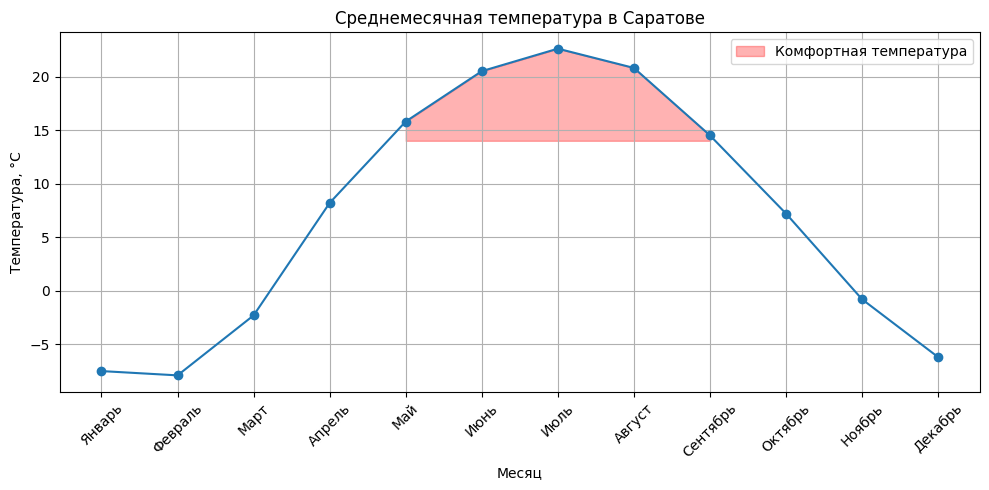

In [34]:
# Данные среднемесячной температуры в Саратове Wikipedia
temperature_data = {
    'Месяц': ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'],
    'Средняя температура, °C': [-7.5, -7.9, -2.3, 8.2, 15.8, 20.5, 22.6, 20.8, 14.5, 7.2, -0.8, -6.2]
}

# Создание DataFrame
temperature_df = pd.DataFrame(temperature_data)

# Создание графика
plt.figure(figsize=(10, 5)) # Задание размера графика
plt.plot(temperature_df['Месяц'], temperature_df['Средняя температура, °C'], marker='o') # Построение линейного графика
plt.fill_between(temperature_df['Месяц'], temperature_df['Средняя температура, °C'], 14, 
                 where=(temperature_df['Средняя температура, °C'] > 14), color='red', alpha=0.3, label='Комфортная температура') # Заполнение области выше 14 градусов
plt.title('Среднемесячная температура в Саратове') # Заголовок графика
plt.xlabel('Месяц') # Подпись оси X
plt.ylabel('Температура, °C') # Подпись оси Y
plt.grid(True) # Добавление сетки
plt.xticks(rotation=45) # Поворот подписей месяцев на 45 градусов для лучшей читаемости
plt.tight_layout() # Автоматическое управление подгонкой подписей, чтобы они не перекрывались
plt.legend() # Отображение легенды
plt.show() # Отображение графика

Основные факторы оценки рынка кикшеринга:

Колличество и платежеспособность населения: Уровень доходов определяет способность людей пользоваться услугами кикшеринга.

Транспортная инфраструктура: Качество дорог, доступность парковок и общественного транспорта влияют на спрос.

Дополнительные факторы:

Климат: Возможность использования кикшеринга в разные сезоны.

Регулирование: Законы и правила, влияющие на работу кикшеринговых сервисов.(Не измерялось)


Анализ конкурентов в г. Саратов по открытым источникам

In [ ]:
# Исходные данные по конкурентам
yandex_go = 371  # Количество велосипедов в прокате (источник приложение Yandex Go)
urent = 300  # Количество велосипедов в прокате (источник сайт https://travelask.ru/russia/saratov/prilozheniya-dlya-arendy-samokatov-v-saratove) в статье указан еще один игрок e-motion, но в приложении нет такой локации с самокатами



Рекомендуемый размер флота

In [11]:
adjusted_potential_clients = 55990  # Скорректированная оценка потенциальной аудитории
verage_trips_per_user = 2.9  # Предположим, что это число верно

#  предположения
percentage_of_active_users = 0.01  # 1% активных пользователей
surge_capacity_factor = 1.1  # Для пиковых нагрузок уменьшим до 10%
utilization_correction_factor = 1.1  # Для неработающих ТС также уменьшим до 10%

# Расчеты
active_users = percentage_of_active_users * adjusted_potential_clients # Количество активных пользователей
total_trips = active_users * average_trips_per_user # Общее количество поездок
base_fleet_size = total_trips / average_trips_per_user # Размер флота 

# Корректировка на пиковые нагрузки и коэффициент использования
adjusted_fleet_size = base_fleet_size * surge_capacity_factor * utilization_correction_factor

# Вывод результата
print(f'Рекомендуемый размер флота: {int(adjusted_fleet_size)}')


Рекомендуемый размер флота: 677


При определении рекомендуемого размера флота для кикшеринга в Саратове, исходим из скорректированного числа потенциальных клиентов, основываясь на поисковых запросах. Предполагаем, что 1% из них будут активными пользователями. Рассчитываем необходимое количество ТС для удовлетворения среднедневного спроса на поездки, с учётом пиковой нагрузки и времени простоя ТС. В результате получаем цифру в 677 ТС, что позволит обеспечить стабильность сервиса и его доступность в часы пик.

In [36]:
# Загрузка и чтение файла GeoPackage с данными о населении Саратова
file_path = 'saratov_hex_pop.gpkg'
saratov_pop_data = gpd.read_file(file_path)

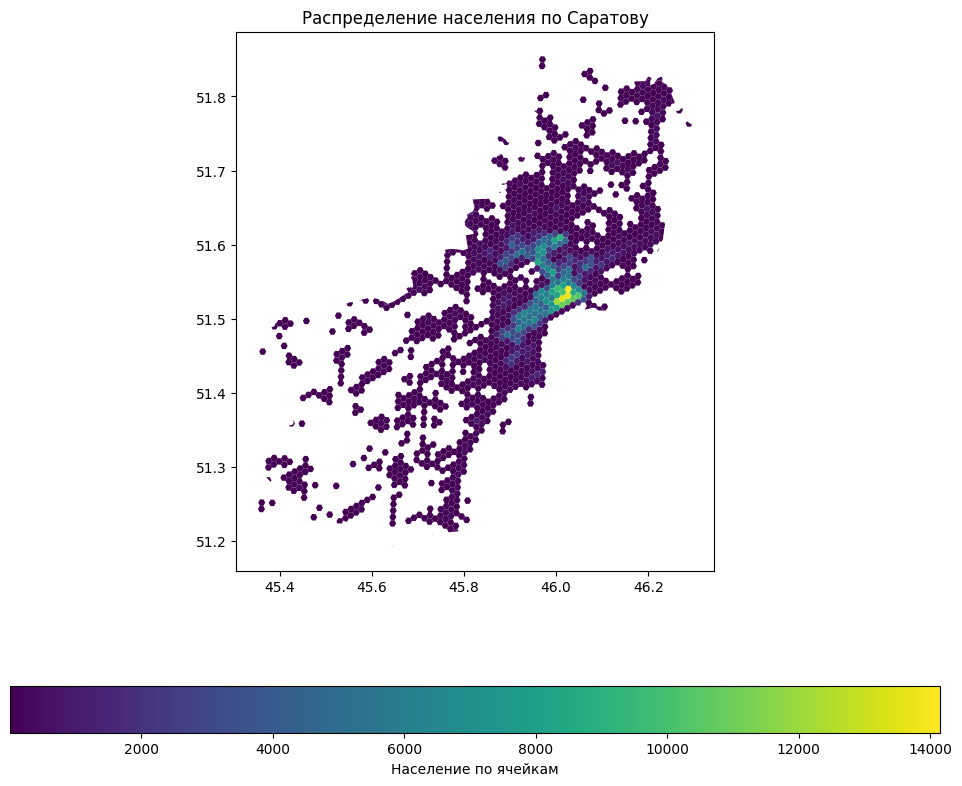

In [37]:
# Визуализация данных о населении Саратова
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
saratov_pop_data.plot(column='population', ax=ax, legend=True, 
                      legend_kwds={'label': "Население по ячейкам", 'orientation': "horizontal"})

plt.title('Распределение населения по Саратову')
plt.show()


In [39]:
saratov_landuse_data = gpd.read_file('saratov_gis_osm_landuse_a_free_1.gpkg')

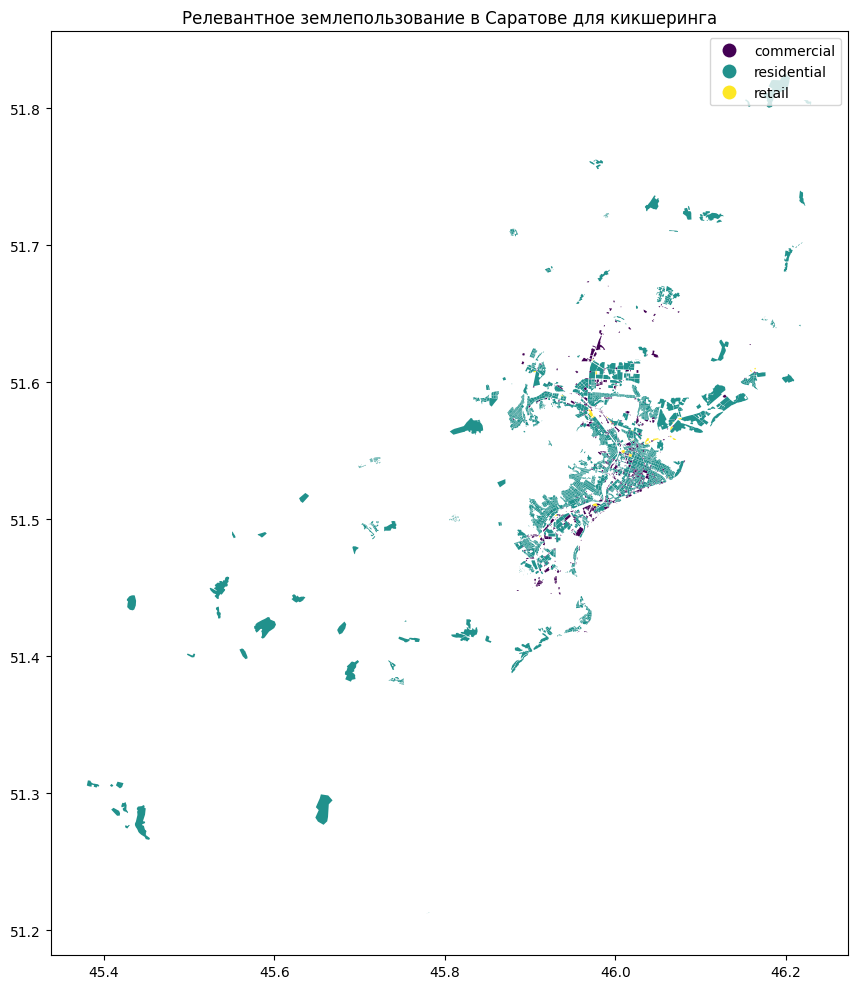

In [42]:
# Отфильтруем данные для визуализации, оставляя только те классы землепользования,
# которые наиболее релевантны для размещения зоны проката: жилые, коммерческие и торговые.
relevant_landuse_classes = ['residential', 'commercial', 'retail']
filtered_landuse_data = saratov_landuse_data[saratov_landuse_data['fclass'].isin(relevant_landuse_classes)]

# Визуализация данных о землепользовании с учетом фильтрации
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
filtered_landuse_data.plot(column='fclass', ax=ax, legend=True,
                           cmap='viridis', categorical=True, legend_kwds={'bbox_to_anchor': (1, 1)})

plt.title('Релевантное землепользование в Саратове для кикшеринга')
plt.tight_layout()
plt.show()


In [45]:
# Загрузка и чтение файла GeoPackage с данными о дорогах и транспортных узлах Саратова
roads_file_path = 'saratov_gis_osm_roads_free_1.gpkg'
saratov_roads_data = gpd.read_file(roads_file_path)
transport_file_path = 'saratov_gis_osm_transport_free_1.gpkg'
saratov_transport_data = gpd.read_file(transport_file_path)

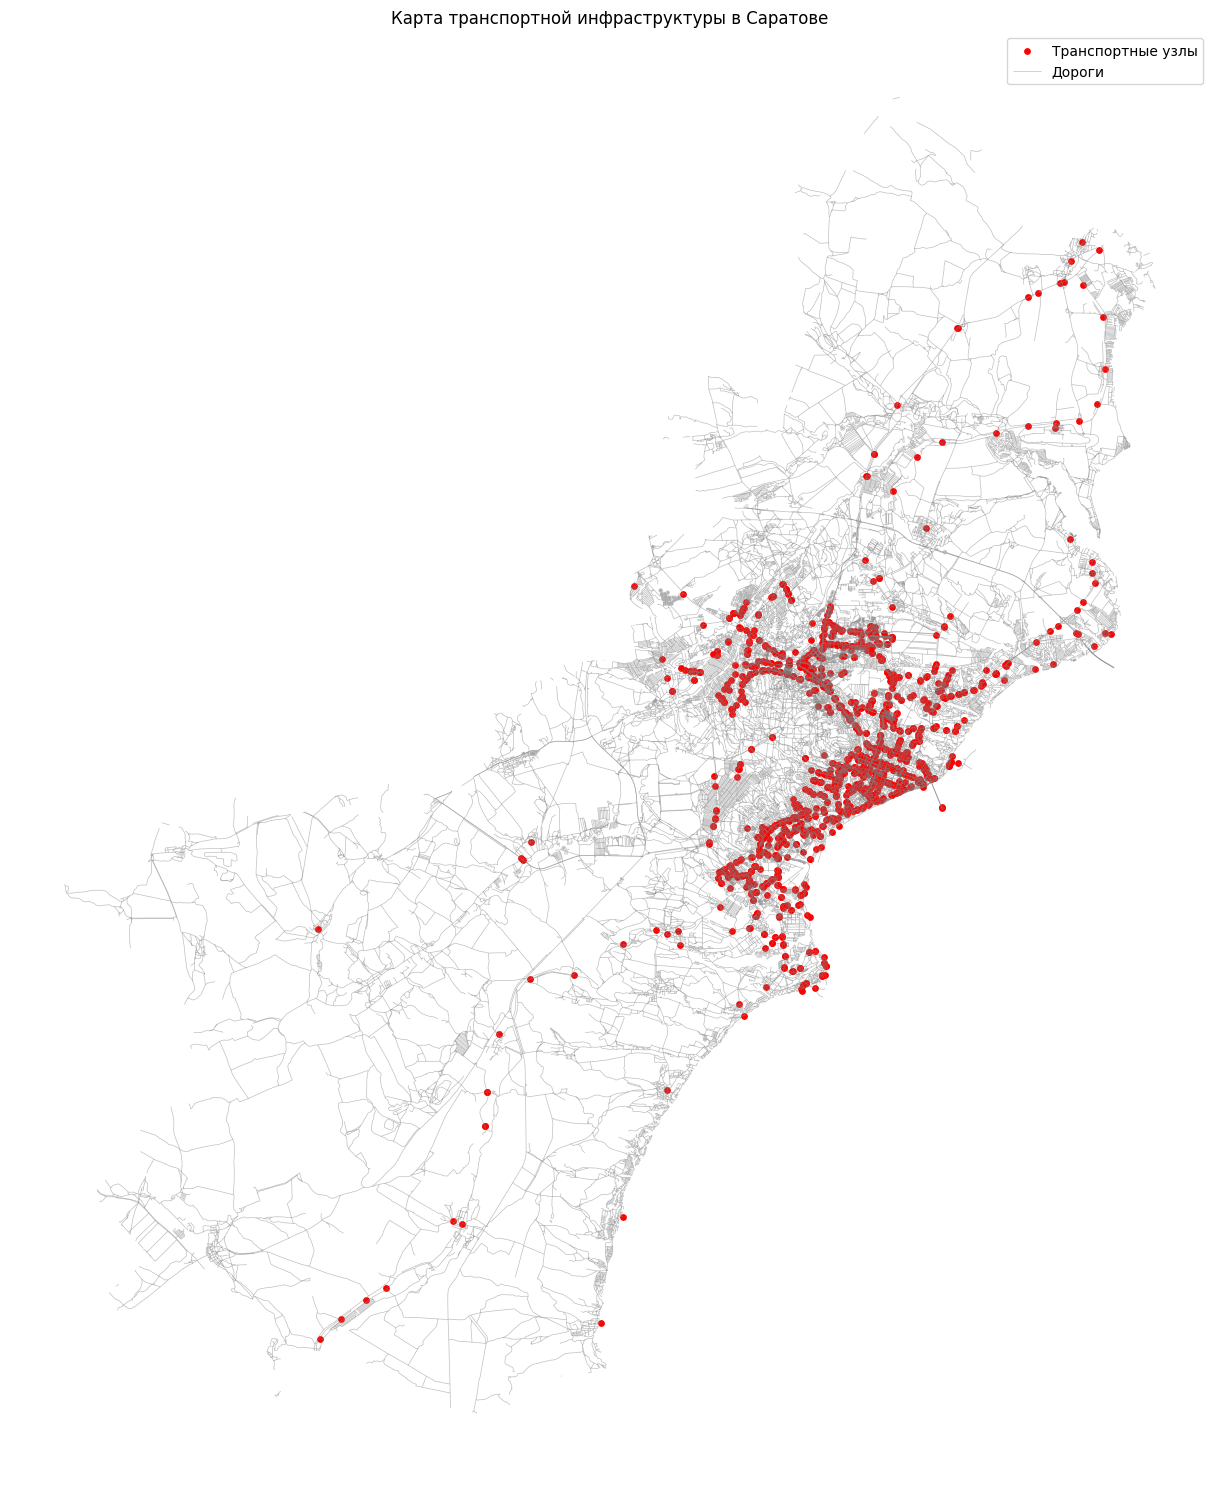

In [53]:
# Визуализация точек транспортной инфраструктуры на карте Саратова
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Отображение транспортных узлов
saratov_transport_data.plot(ax=ax, color='red', markersize=15, label='Транспортные узлы')
# Отображение дорог
saratov_roads_data.plot(ax=ax, linewidth=0.5, color='grey', alpha=0.5, label='Дороги')

plt.title('Карта транспортной инфраструктуры в Саратове')
ax.set_axis_off()
plt.legend()
plt.tight_layout()
plt.show()

Для формирования сплошной зоны проката самокатов в Саратове, следует учитывать следующие ключевые характеристики:

Плотность населения: Выбор зон с высокой плотностью населения обеспечит большее число потенциальных пользователей и, как следствие, более высокую частоту использования самокатов.
Землепользование: Приоритет отдается жилым и коммерческим зонам, а также торговым центрам, так как именно в этих районах жители чаще всего нуждаются в краткосрочной аренде транспорта для поездок на короткие расстояния.
Транспортная инфраструктура: Важно разместить зоны проката вблизи транспортных узлов, таких как автобусные остановки и железнодорожные станции, чтобы самокаты могли служить связующим звеном между общественным транспортом и конечным пунктом назначения пользователя.
Для создания единой сплошной зоны, мы можем использовать геопространственный анализ, чтобы сгенерировать полигон, который охватывает ключевые районы, удовлетворяющие вышеуказанным критериям. Отброшение маленьких изолированных полигонов и объединение близко расположенных зон в один сплошной полигон поможет оптимизировать обслуживание и доступность самокатов для пользователей.

Такой полигон должен охватывать:

Густонаселенные районы, особенно те, которые расположены вдоль ключевых дорожных артерий.
Коммерческие и торговые зоны, которые являются местами высокой активности и потенциального спроса на кикшеринг.
Остановки общественного транспорта для удобства комбинирования различных видов транспорта.

/var/folders/y5/1jwj62851wd0vzgt6b_jkbgh0000gn/T/ipykernel_1623/3556773207.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


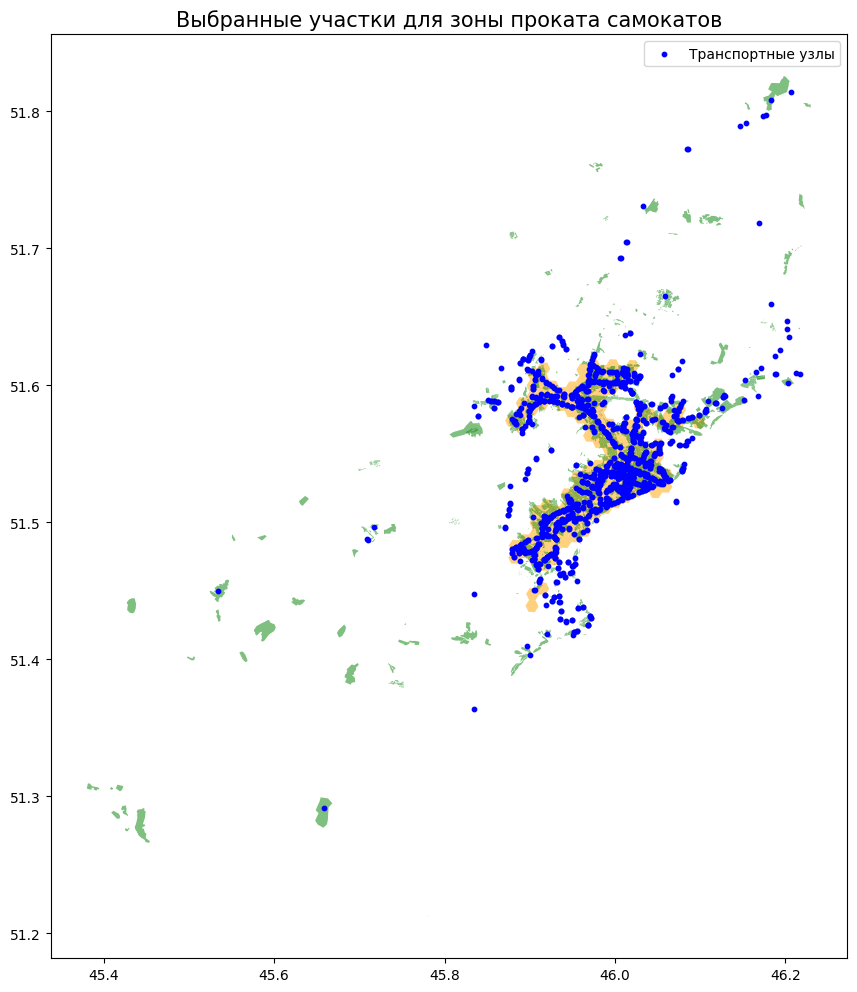

In [267]:
# Фильтрация данных землепользования по жилым и коммерческим зонам
relevant_landuse_types = ['residential', 'commercial', 'retail', 'industrial']
relevant_landuse_gdf = filtered_landuse_data[filtered_landuse_data['fclass'].isin(relevant_landuse_types)]

# Выбор ключевых транспортных узлов
relevant_transport_types = ['bus_stop', 'station', 'tram_stop']
relevant_transport_gdf = saratov_transport_data[saratov_transport_data['fclass'].isin(relevant_transport_types)]

# Фильтрация данных о плотности населения
# Выбираем участки с высокой плотностью населения
high_density_threshold = saratov_pop_data['population'].quantile(0.9)  # Топ 10% участков по плотности населения
high_density_gdf = saratov_pop_data[saratov_pop_data['population'] >= high_density_threshold]

# Визуализация выбранных участков
fig, ax = plt.subplots(figsize=(12, 12))

# Плотность населения
high_density_gdf.plot(ax=ax, color='orange', alpha=0.5, label='Высокая плотность населения')

#Землепользование
relevant_landuse_gdf.plot(ax=ax, color='green', alpha=0.5, label='Жилые/Коммерческие зоны')

#Транспорт
relevant_transport_gdf.plot(ax=ax, color='blue', markersize=10, label='Транспортные узлы')

ax.set_title('Выбранные участки для зоны проката самокатов', fontsize=15)
ax.legend()

plt.show()



In [257]:
# Создание буфера вокруг центроидов
centroid_buffer = high_density_gdf.geometry.centroid.buffer(1000)  # 1000 метров вокруг каждого центроида

# Фильтрация транспортных узлов, попадающих в буфер
filtered_transport_gdf = relevant_transport_gdf[relevant_transport_gdf.geometry.within(centroid_buffer.unary_union)]

In [258]:
import geopandas as gpd
from shapely.ops import unary_union

# Убедимся, что все данные в одной системе координат
utm_zone = "EPSG:32638"
relevant_landuse_gdf = filtered_landuse_data.to_crs(utm_zone)
high_density_gdf = saratov_pop_data.to_crs(utm_zone)
relevant_transport_gdf = filtered_transport_gdf.to_crs(utm_zone)

# Выбор участков с высокой плотностью населения
high_density_threshold = high_density_gdf['population'].quantile(0.9)
high_density_gdf = high_density_gdf[high_density_gdf['population'] >= high_density_threshold]

# Пересечение землепользования с участками высокой плотности населения
intersected_landuse = gpd.overlay(relevant_landuse_gdf, high_density_gdf, how='intersection')

# Создание буфера вокруг транспортных узлов
buffer_radius = 500  # радиус буфера в метрах
transport_buffer = relevant_transport_gdf.buffer(buffer_radius)


final_polygon = unary_union([intersected_landuse.unary_union, transport_buffer.unary_union])

    # Создание GeoDataFrame из финального полигон
final_gdf = gpd.GeoDataFrame(geometry=[final_polygon], crs=utm_zone)

final_gdf.to_file('final_rental_zone.gpkg', driver='GPKG')



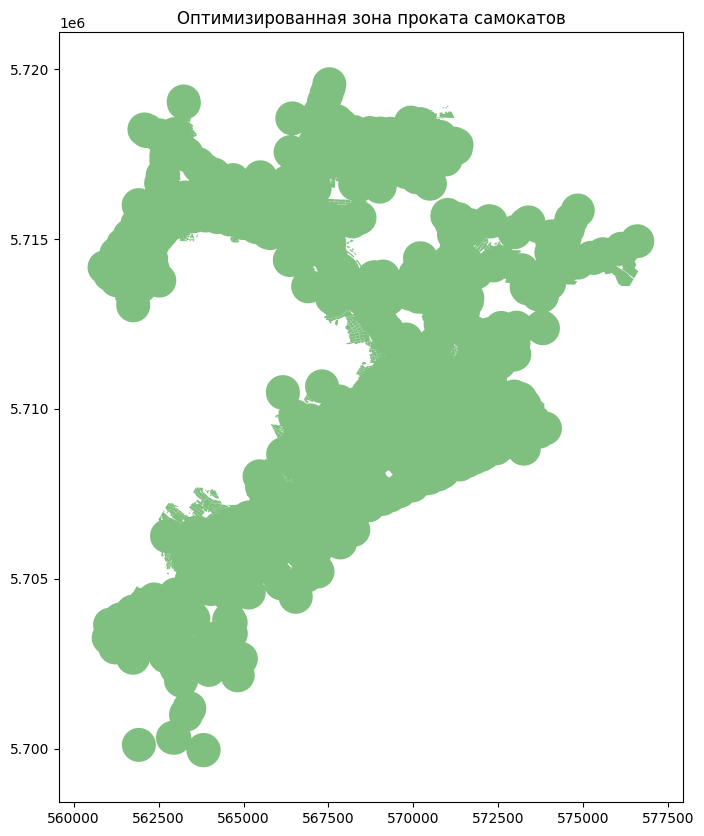

In [259]:
#plotting the final polygon
fig, ax = plt.subplots(figsize=(10, 10))
final_gdf.plot(ax=ax, color='green', alpha=0.5)
ax.set_title('Оптимизированная зона проката самокатов')
plt.show()


In [260]:
from shapely.geometry import MultiPolygon, shape
from shapely.ops import unary_union

# Пороговое значение для фильтрации маленьких полигонов
min_area_threshold = 100000000  # Примерное значение в квадратных метрах

# Фильтрация маленьких полигонов
polygons = []
for geometry in final_gdf.geometry:
    if isinstance(geometry, MultiPolygon):
        polygons.extend([poly for poly in geometry.geoms if poly.area >= min_area_threshold])
    else:
        if geometry.area >= min_area_threshold:
            polygons.append(geometry)

# Объединение отфильтрованных полигонов в один
filtered_polygon = unary_union(polygons)

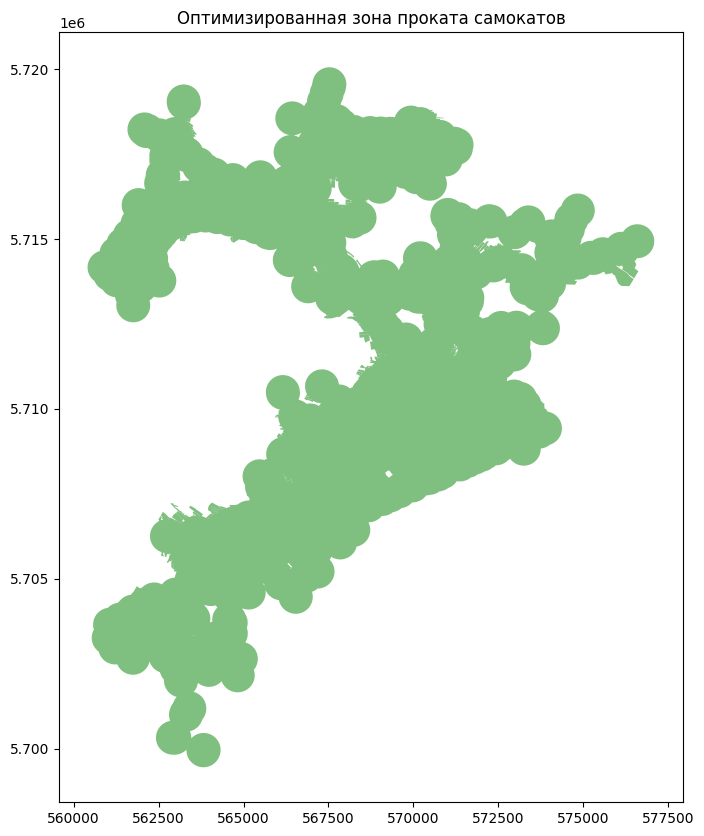

In [261]:
# Визуализация
fig, ax = plt.subplots(figsize=(10, 10))
gpd.GeoSeries(filtered_polygon).plot(ax=ax, color='green', alpha=0.5)
ax.set_title('Оптимизированная зона проката самокатов')
plt.show()


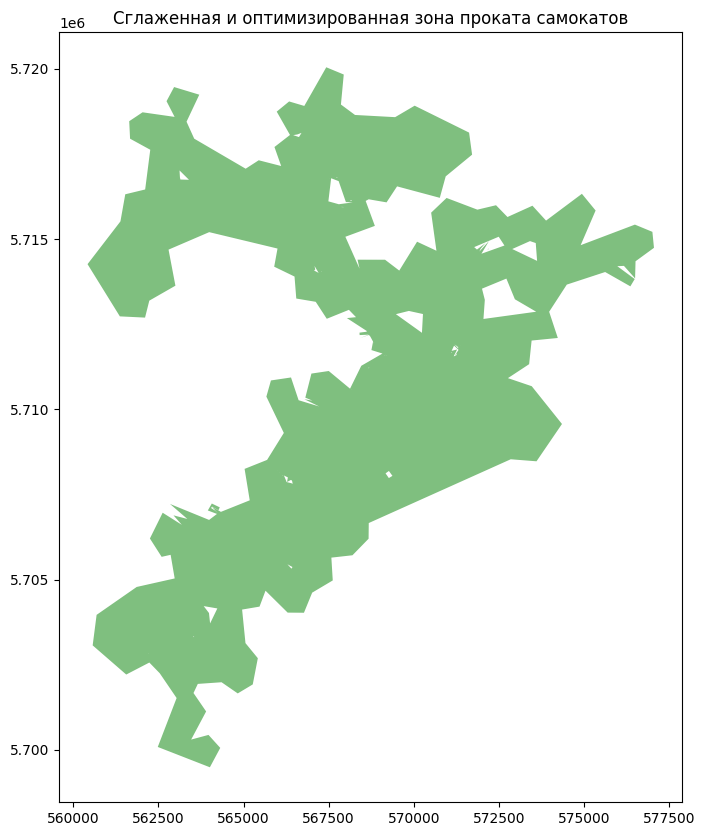

In [262]:
# Сглаживание границ полигона
tolerance = 200  # Значение допуска сглаживания
smoothed_polygon = filtered_polygon.simplify(tolerance)

# Создание GeoDataFrame для сглаженного полигона
smoothed_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(smoothed_polygon), crs=utm_zone)

# Визуализация
fig, ax = plt.subplots(figsize=(10, 10))
smoothed_gdf.plot(ax=ax, color='green', alpha=0.5)
ax.set_title('Сглаженная и оптимизированная зона проката самокатов')
plt.show()

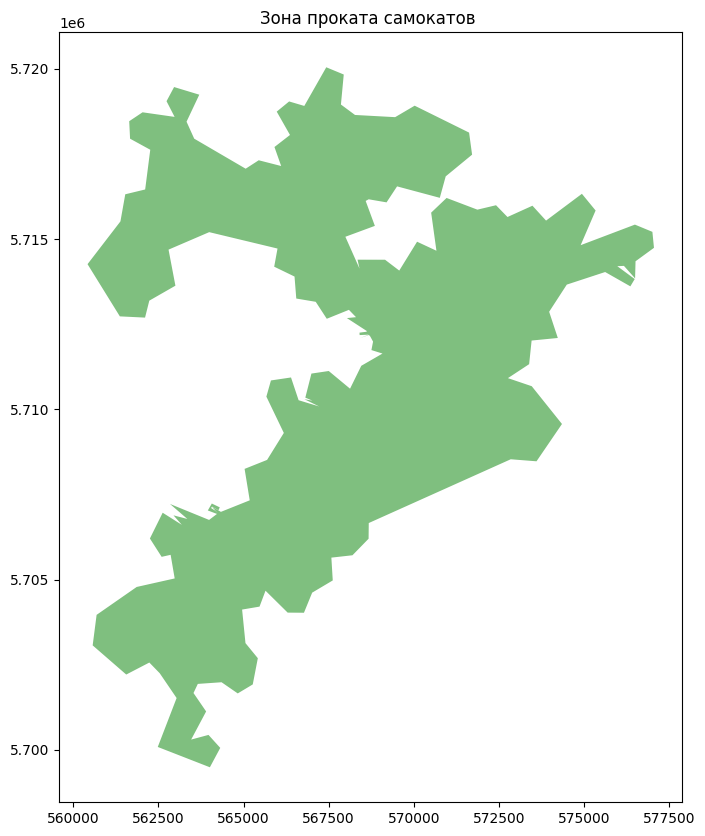

In [263]:
from shapely.geometry import Polygon

# Функция для удаления маленьких отверстий из полигона
def remove_small_holes(polygon, area_threshold):
    # Создаем новый полигон без маленьких отверстий
    new_exterior = polygon.exterior
    new_interiors = [interior for interior in polygon.interiors if Polygon(interior).area >= area_threshold]
    return Polygon(new_exterior, new_interiors)

# Пороговое значение площади для отверстий
hole_area_threshold = 10000000  # Примерное значение в квадратных метрах

# Применение функции удаления отверстий к каждому полигону
smoothed_gdf['geometry'] = smoothed_gdf['geometry'].apply(lambda poly: remove_small_holes(poly, hole_area_threshold))

# Визуализация и сохранение результата
fig, ax = plt.subplots(figsize=(10, 10))
smoothed_gdf.plot(ax=ax, color='green', alpha=0.5)
ax.set_title('Зона проката самокатов ')
plt.show()

# Сохранение результата в файл
smoothed_gdf.to_file('final_rental_zone_no_small_holes.gpkg', driver='GPKG')


In [265]:
# Создаем базовую карту
m = folium.Map(location=[51.5300, 46.0343], zoom_start=11)  # Координаты центра Саратова
smoothed_gdf_wgs84 = smoothed_gdf.to_crs(epsg=4326)  # Проецирование в WGS84

# Добавляем слои на карту

folium.GeoJson(
    smoothed_gdf_wgs84.to_json(),
    name='Зона проката самокатов',
    style_function=lambda feature: {
        'fillColor': 'red',
        'color': 'red',
        'weight': 1,
        'fillOpacity': 0.3,
    }
).add_to(m)

# Добавление слоя управления (для включения/выключения слоев)
folium.LayerControl().add_to(m)

# Сохраняем карту в HTML файл
m.save('interactive_map.html')

In [266]:
# Выводим карту
m